In [1]:
import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
table = soup.find_all("tbody")[1]

for row in table.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True)

tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"",regex=True)
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.tail()


,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [3]:
import yfinance as yf

gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


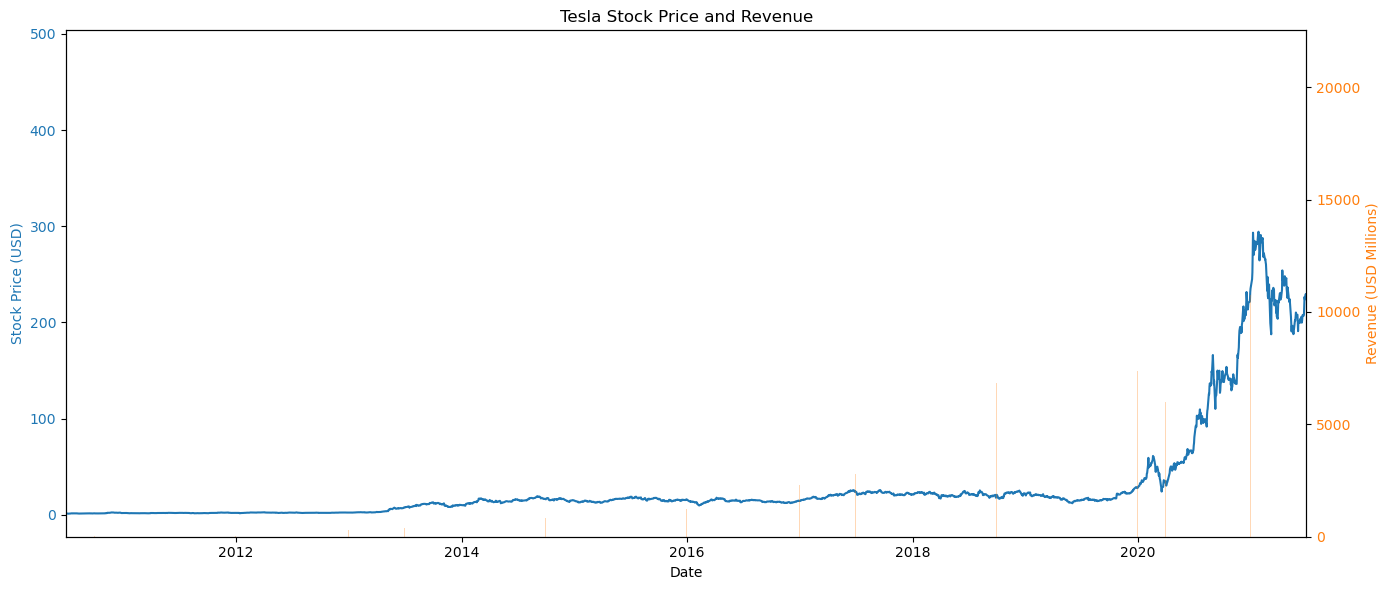

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert Date columns to datetime
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Define the make_graph function
def make_graph(stock_data, revenue_data, company):
    fig, ax1 = plt.subplots(figsize=(14,6))

    # Stock Price Line
    ax1.plot(stock_data['Date'], stock_data['Close'], color='tab:blue', label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price (USD)', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Create second y-axis for Revenue
    ax2 = ax1.twinx()
    ax2.bar(revenue_data['Date'], revenue_data['Revenue'].astype(float), color='tab:orange', alpha=0.3, label='Revenue')
    ax2.set_ylabel('Revenue (USD Millions)', color='tab:orange')
    ax2.tick_params(axis='y', labelcolor='tab:orange')

    # Limit data to June 2021
    ax1.set_xlim([min(stock_data['Date']), pd.to_datetime('2021-06-30')])

    # Title & layout
    plt.title(f'{company} Stock Price and Revenue')
    fig.tight_layout()
    plt.show()

# Call the function for Tesla
make_graph(tesla_data, tesla_revenue, 'Tesla')


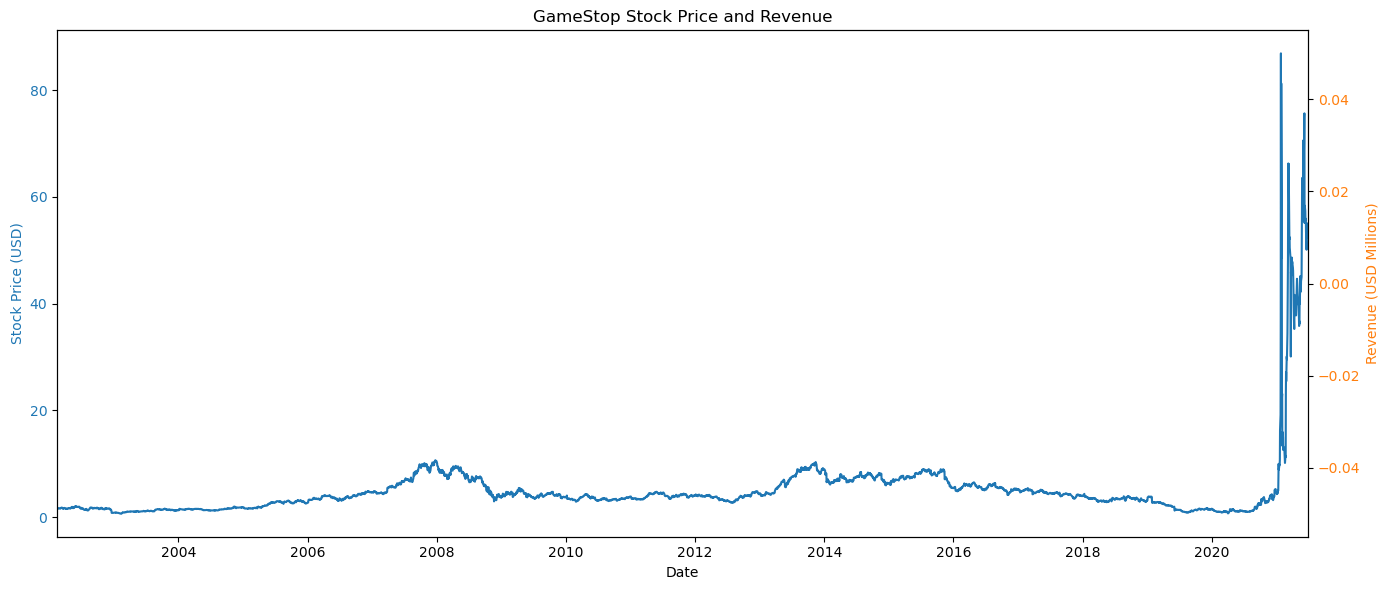

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert Date columns to datetime
gme_data['Date'] = pd.to_datetime(gme_data['Date'])
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

# Define the make_graph function (same as Tesla)
def make_graph(stock_data, revenue_data, company):
    fig, ax1 = plt.subplots(figsize=(14,6))

    # Stock Price Line
    ax1.plot(stock_data['Date'], stock_data['Close'], color='tab:blue', label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price (USD)', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Create second y-axis for Revenue
    ax2 = ax1.twinx()
    ax2.bar(revenue_data['Date'], revenue_data['Revenue'].astype(float), color='tab:orange', alpha=0.3, label='Revenue')
    ax2.set_ylabel('Revenue (USD Millions)', color='tab:orange')
    ax2.tick_params(axis='y', labelcolor='tab:orange')

    # Limit data to June 2021
    ax1.set_xlim([min(stock_data['Date']), pd.to_datetime('2021-06-30')])

    # Title & layout
    plt.title(f'{company} Stock Price and Revenue')
    fig.tight_layout()
    plt.show()

# Call the function for GameStop
make_graph(gme_data, gme_revenue, 'GameStop')


In [21]:

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])


table = soup.find_all("table")[1]

for row in table.tbody.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$","").replace(",","")
        if revenue != "":
            gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True)


gme_revenue["Revenue"] = gme_revenue["Revenue"].astype(float)
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])


gme_revenue.tail()


,Date,Revenue
57,2006-01-31,1667.0
58,2005-10-31,534.0
59,2005-07-31,416.0
60,2005-04-30,475.0
61,2005-01-31,709.0
